# Data visualization

In [ ]:
# # для установки библиотек
# ! pip3 install seaborn
# ! pip3 install plotly
# ! pip3 install ggplot
# ! pip3 install matplotlib
# ! pip3 install matplotlib==3.0.0

In [1]:
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Matplotlib

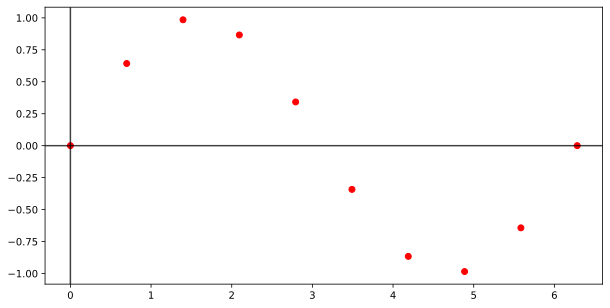

In [3]:
xs = np.linspace(0, 2*np.pi, num=10)
plt.scatter(xs, np.sin(xs), c='r')
plt.axhline(c='k', alpha=0.75)
plt.axvline(c='k', alpha=0.75);

We'll use [Kaggle Video Games Dataset](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings) for visualizations.

In [4]:
df = pd.read_csv('Video_Games_Sales.csv.zip')
print(df.shape)

(16719, 16)


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [9]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [11]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head(10)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32,87.0,80,8.4,594,E
11,Mario Kart DS,DS,2005,Racing,23.21,91.0,64,8.6,464,E
13,Wii Fit,Wii,2007,Sports,22.70,80.0,63,7.7,146,E
14,Kinect Adventures!,X360,2010,Misc,21.81,61.0,45,6.3,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.79,80.0,33,7.4,52,E


    
Начнем с самого простого и зачастую удобного способа визуализировать данные из `pandas dataframe` — это воспользоваться функцией `plot.`
Для примера построим **график продаж видео игр в различных странах в зависимости от года**. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам и у получившегося `dataframe` вызовем функцию `plot` без параметров. 

В библиотеку `pandas` встроен wrapper для `matplotlib`.

In [12]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [13]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]\
    .groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


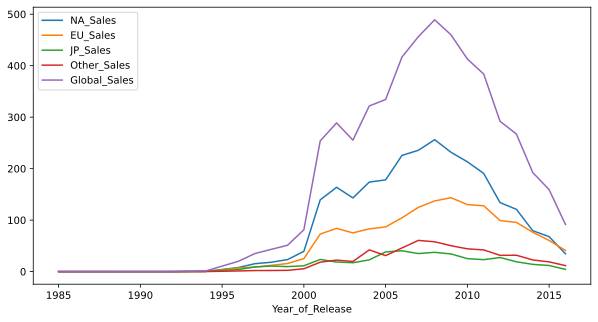

In [14]:
df1.plot();

В этом случае мы сконцентрировались на отображении трендов продаж в разных регионах.

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметра rot отвечает за угол наклона подписей к оси x.

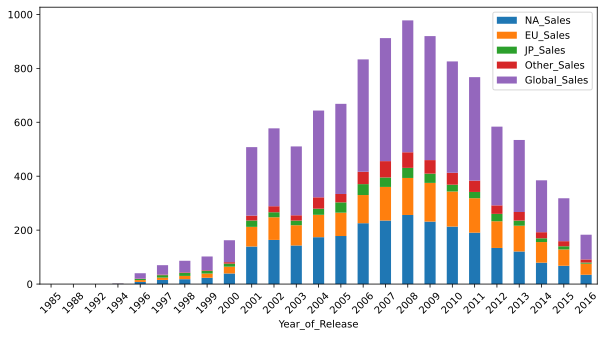

In [15]:
df1.plot(kind='bar', rot=45, stacked=True);

Или можем сделать stacked bar chart, чтобы показать и динамику продаж и их разбиение по рынкам.

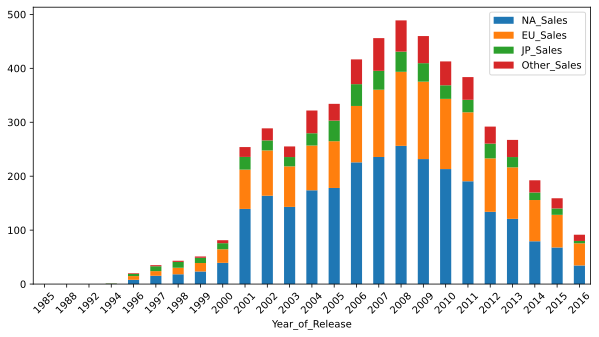

In [16]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='bar', rot=45, stacked=True);

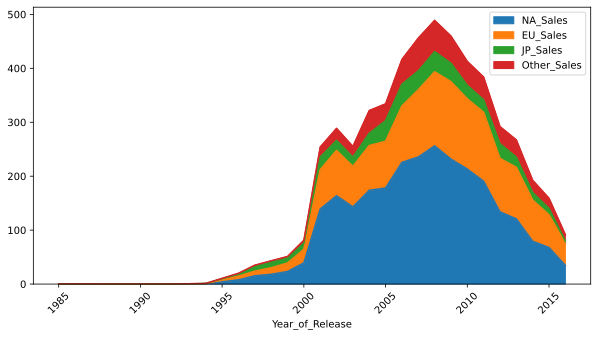

In [17]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45);

Еще один часто встречающийся тип графиков - это гистограммы. Посмотрим на **распределение оценок критиков**.

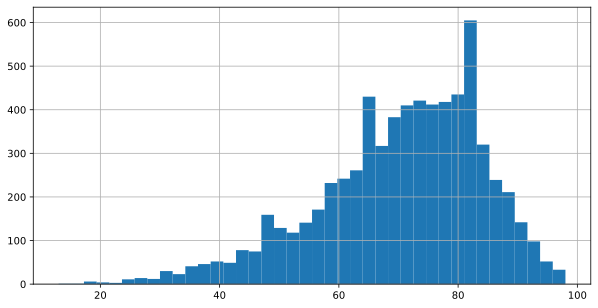

In [18]:
df.Critic_Score.hist(bins=40);

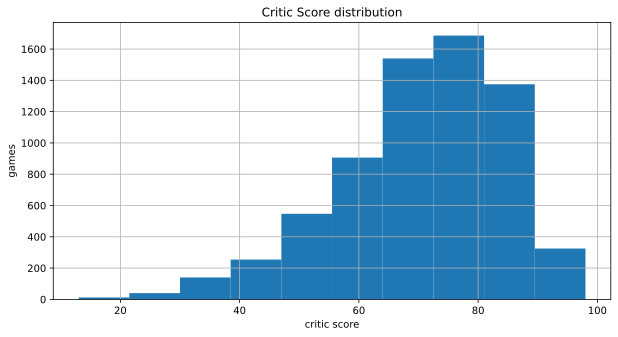

In [19]:
ax = df.Critic_Score.hist()
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games');

У гистограмм можно контролировать, на сколько групп мы разбиваем распределение с помощью параметра `bins`.

In [ ]:
ax = df.Critic_Score.hist(bins=20)
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games');

Еще немного познакомимся с тем, как в pandas можно стилизовать таблицы.

In [ ]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

In [ ]:
# ! pip3 install jinja2

In [ ]:
top_developers_df.style.bar()

In [ ]:
with open('developers_rend.html', 'w') as f:
    f.write(top_developers_df.style.bar().render())

### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)
 * [Документация matplotlib](https://matplotlib.org/)

## Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков **pair plot (scatter plot matrix)**. Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки. 

In [ ]:
import seaborn as sns

In [ ]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[['Global_Sales', 'Critic_Score', 'User_Score']]);
sns_plot.savefig('pairplot.png')

Также с помощью `seaborn` можно построить распределение, для примера посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По default'у на графике отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

In [ ]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Critic_Score);

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и __`joint_plot`__ – это гибрид `scatter plot` и `histogram` (отображаются также гистограммы распределений признаков). Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='reg');

### Box-and-Wisker Plot

Еще один полезный тип графиков - это __`box plot`__. Давайте **сравним пользовательские оценки игр для топ-5 крупнейших игровых платформ**.

In [ ]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5)
top_platforms

In [ ]:
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms.index.values)]);

`Box plot` состоит из коробки (поэтому он и называется `box plot`), усиков и точек. Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (`Q1`) и 75% (`Q3`) процентили. Черта внутри коробки обозначает медиану распределения. 
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, где `IQR = Q3 - Q1` - интерквантильный размах. Точками на графике обозначаются выбросы (`outliers`) - те значения, которые не вписываются в промежуток значений, заданный усами графика.


<img src="https://miro.medium.com/max/1400/1*0MPDTLn8KoLApoFvI0P2vQ.png">

И еще один тип графиков (последний из тех, которые мы рассмотрим в этой части) - это __`heat map`__. `Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

In [ ]:
sns.heatmap(platform_genre_sales, annot=False, fmt=".1f", center = True);

### Полезные ссылки
* [Tutorial](https://seaborn.pydata.org/tutorial.html)
* [Gallery](https://seaborn.pydata.org/examples/index.html)

## Plotly

Мы рассмотрели визуализации на базе библиотеки `matplotlib`. Однако, это не единственная опция для построения графиков на языке `python`. Познакомимся также с библиотекой __`plotly`__. `Plotly` - это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код. 

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

Перед началом работы импортируем все необходимые модули и инициализируем `plotly` с помощью команды `init_notebook_mode`.

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим __`line plot` с динамикой числа вышедших игр и их продаж по годам__. 

In [ ]:
global_sales_years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum()
global_sales_years_df.head()

In [ ]:
released_years_df = df.groupby('Year_of_Release')[['Name']].count()
released_years_df.head()

In [ ]:
years_df = global_sales_years_df.join(released_years_df)
years_df.head()

In [ ]:
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df.head()

В `plotly` строится визуализация объекта `Figure`, который состоит из данных (массив линий, которые в библиотеке называются `traces`) и оформления/стиля, за который отвечает объект `layout`. В простых случаях можно вызывать функцию `iplot` и просто от массива `traces`.

In [ ]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)
#fig.show()
iplot(fig, show_link = False)


Также можно сразу сохранить график в виде html-файла.

In [ ]:
# plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

Посмотрим также на __рыночную долю игровых платформ, расчитанную по количеству выпущенных игр и по суммарной выручке__. Для этого построим __`bar chart`__.

In [ ]:
global_sales_platforms_df = df.groupby('Platform')[['Global_Sales']].sum()
released_platforms_df = df.groupby('Platform')[['Name']].count()
platforms_df = global_sales_platforms_df.join(released_platforms_df)

platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', inplace=True)
platforms_df = platforms_df.apply(lambda x: 100*x/platforms_df.sum(), axis = 1)
platforms_df.head()

In [ ]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales',
    orientation = 'v'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share', 'xaxis': {'title': 'platform'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В `plotly` можно построить и __`box plot`__. Рассмотрим __различия оценок критиков в зависимости от жанра игры__.

In [ ]:
df.Genre.unique()

In [ ]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, 
               name=genre)
    )
iplot(data, show_link = False)

Давайте посмотрим на график зависимости средней оценки пользователей и оценки критиков по жанрам. Это будет обычный scatter plot.

In [ ]:
scores_genres_df = df.groupby('Genre')[['Critic_Score', 'User_Score']].mean()
sales_genres_df = df.groupby('Genre')[['Global_Sales']].sum()

genres_df = scores_genres_df.join(sales_genres_df)
    
genres_df.head()

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres', 'yaxis': {'title': 'user score'}, 
          'xaxis': {'title': 'critic score'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Пока что ничего непонятно, давайте добавим к точкам подписи.

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Далее добавим на график еще одно измерение - размер жанра (суммарный объем продаж, который мы заранее посчитали) и получим bubble chart.

In [ ]:
genres_df.index

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    #textposition='bottom',
    marker = dict(
        size = 1/10*genres_df.Global_Sales,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of video games genres',
    'xaxis': {'title': 'Critic Score'},
    'yaxis': {'title': 'User Score'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В plotly есть возможность делать графики в drop down menus, когда в зависимости от выбранного среза будут отображаться различные графики. Давайте построим __гистораммы распределений оценок пользователей по жанрам__.

In [ ]:
traces = []
for genre in ['Racing', 'Shooter', 'Sports', 'Action']:
    traces.append(
        go.Histogram(
            x=df[df.Genre == genre].User_Score,
            histnorm='probability', 
            name = genre, 
            visible = (genre == 'Racing'))
    )
    
layout = go.Layout(
    title='User Score Distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='Racing',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='Shooter',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='Sports',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True]],
                    label='Action',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

### Полезные ссылки
* [Галерея](https://plot.ly/python/)
* [Документация](https://plot.ly/python/reference/)

### Plotly express

Это обертка над `plotly.graph_objects`, которая позволяет строить графики проще.

[Документация](https://plot.ly/python/plotly-express/)

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(df, x= 'User_Score', y = 'Critic_Score')

In [ ]:
px.scatter(df, x= 'User_Score', y = 'Critic_Score', color = 'Genre')

In [ ]:
px.scatter(df, x= 'User_Score', y = 'Critic_Score', 
           marginal_y = 'histogram', marginal_x = 'histogram', trendline="ols")

In [ ]:
px.scatter(df[df.Platform.isin(top_platforms)], x= 'User_Score', y = 'Critic_Score', 
           marginal_y = 'histogram', marginal_x = 'histogram', trendline="ols", facet_col = 'Platform')

In [ ]:
px.scatter_matrix(df[['Global_Sales', 'Critic_Score', 'User_Score']])